# Generate synthetic data

## Synthetic data

In [1]:
from algs import * 
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# set the random seed
np.random.seed(0)

In [3]:
def gen_matrix_general(
    noise=0, 
    x_weight=None, 
    y_weight=None,
    dist_weight_left=np.array([-3, -6, -9]),
    dist_weight_right=np.array([3, 6, 9]),
    b=500,
    data_dir="data", 
    N_trial=3, 
    save_name="synt"
):
    for trial in range(N_trial):
        np.random.seed(trial)

        # Contexts: [8^3, 3]
        contexts = gen_samples_3d([8, 8, 8])
        N = 8*8*8

        # create distance matrix
        difference = contexts[:, np.newaxis, :] - contexts[np.newaxis, :, :] # [1000, 1000, 3]
        diff_left = difference.copy()
        diff_right = difference.copy()
        diff_left[diff_left>0]=0
        diff_right[diff_right<0]=0
        distances_matrix = -(diff_left @ dist_weight_left + diff_right @ dist_weight_right).astype(np.float64)
        
        # noise matrix
        noise_matrix = noise * np.random.normal(loc=0.0, scale=1, size=(N, N))

        # f(x) matrix, same for each row
        if x_weight=="Linear":
            fx_matrix = (contexts @ np.array([4,4,4]))[:, np.newaxis]
        elif x_weight=="None":
            fx_matrix = 0
        elif x_weight=="Quadratic":
            fx_matrix = ((-np.square(contexts - 4)) @ np.array([1,1,1]))[:, np.newaxis]

        if y_weight=="Quadratic":
            gy_matrix = ((-np.square(contexts - 4)) @ np.array([1,1,1]))[np.newaxis, :]
        elif y_weight=="None":
            gy_matrix = 0
        elif y_weight=="Linear":
            gy_matrix = (contexts @ np.array([3, 3, 3]))[np.newaxis, :]
        elif y_weight=="Random":
            gy_matrix = np.random.uniform(0, 50, N)[np.newaxis, :]

        matrix = b + distances_matrix + fx_matrix + gy_matrix + noise_matrix

        # plt.imshow(matrix)
        # plt.colorbar()
        # plt.title(f"Matrix with {save_name} trial {trial}")
        # plt.show()
        np.save(f"{data_dir}/transfer_reward_matrix_{save_name}_trial{trial}.npy", matrix)

In [4]:
# convert np.array([3, 3, 3]) to 333
def convert_to_str(arr):
    if arr is None:
        return None
    # if arr is string
    elif isinstance(arr, str):
        return arr
    else:
        return "".join([str(x) for x in arr])

In [ ]:
noise_list = [0, 5, 15, 30]
x_weight_list = ["Linear", "None"]
y_weight_list = ["Linear", "None"]
dist_weight_left_list = [np.array([-3, -3, -3]), np.array([1, 1, -3])]
dist_weight_right_list = [np.array([3, 3, 3])]
N_trial=100
for noise in noise_list:
    for x_weight in x_weight_list:
        for y_weight in y_weight_list:
            for dist_weight_left in dist_weight_left_list:
                for dist_weight_right in dist_weight_right_list:
                    gen_matrix_general(
                        noise=noise,
                        x_weight=x_weight,
                        y_weight=y_weight,
                        dist_weight_left=dist_weight_left,
                        dist_weight_right=dist_weight_right,
                        N_trial=N_trial,
                        save_name=f"synt_g_noise{noise}_x_weight{convert_to_str(x_weight)}_y_weight{convert_to_str(y_weight)}_dist_left{convert_to_str(dist_weight_left)}_dist_right{convert_to_str(dist_weight_right)}"
                    )


# Generate synthetic data by bootstrapping from real data

### Cartpole

In [49]:
N_TRIAL = 100

In [50]:
# import three transfer matrices
matrix1 = np.load("data/transfer_reward_matrix_trial0.npy")
matrix2 = np.load("data/transfer_reward_matrix_trial1.npy")
matrix3 = np.load("data/transfer_reward_matrix_trial2.npy")

for seed in range(3,N_TRIAL+3):
    np.random.seed(seed*42)
    new_matrix = np.zeros_like(matrix1)
    # for each row bootstrapping from one of the three matrices
    for i in range(matrix1.shape[0]):
        choice = np.random.choice(3)
        new_matrix[i] = matrix1[i] if choice == 0 else matrix2[i] if choice == 1 else matrix3[i]
    np.save(f"data/transfer_reward_matrix_trial{seed}.npy", new_matrix)
        

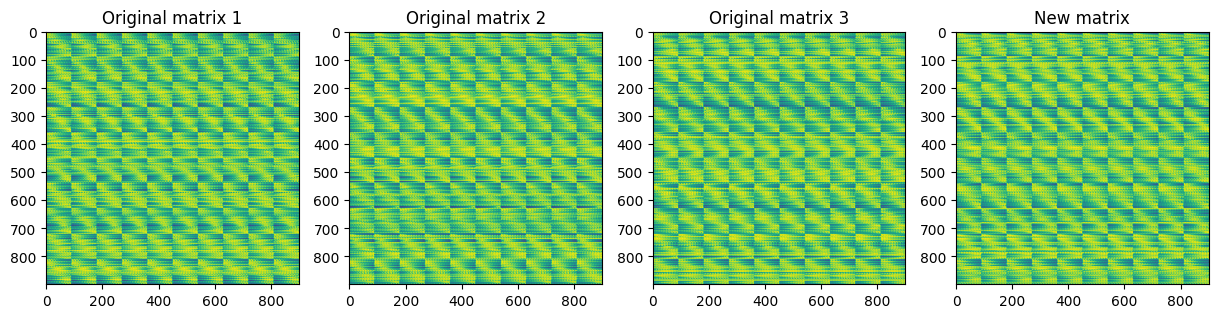

In [51]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(matrix1)
axs[0].set_title('Original matrix 1')

axs[1].imshow(matrix2)
axs[1].set_title('Original matrix 2')

axs[2].imshow(matrix3)
axs[2].set_title('Original matrix 3')

axs[3].imshow(new_matrix)
axs[3].set_title('New matrix')

plt.show()


### BipedalWalker

In [52]:
N_TRIAL = 100

In [53]:
# import three transfer matrices
matrix1 = np.load("data/transfer_reward_bipedalwalker_matrix_8_trial0.npy")
matrix2 = np.load("data/transfer_reward_bipedalwalker_matrix_8_trial1.npy")
matrix3 = np.load("data/transfer_reward_bipedalwalker_matrix_8_trial2.npy")

for seed in range(3,N_TRIAL+3):
    np.random.seed(seed*42)
    new_matrix = np.zeros_like(matrix1)
    # for each row bootstrapping from one of the three matrices
    for i in range(matrix1.shape[0]):
        choice = np.random.choice(3)
        new_matrix[i] = matrix1[i] if choice == 0 else matrix2[i] if choice == 1 else matrix3[i]
    np.save(f"data/transfer_reward_bipedalwalker_matrix_8_trial{seed}.npy", new_matrix)
        

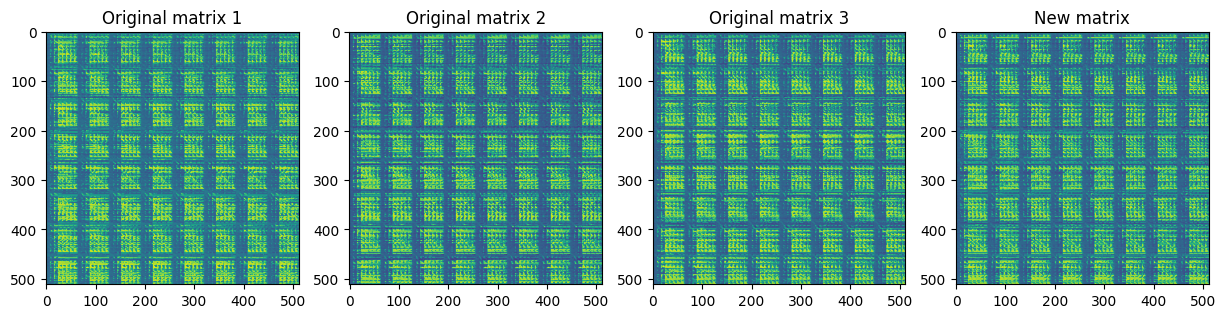

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(matrix1)
axs[0].set_title('Original matrix 1')

axs[1].imshow(matrix2)
axs[1].set_title('Original matrix 2')

axs[2].imshow(matrix3)
axs[2].set_title('Original matrix 3')

axs[3].imshow(new_matrix)
axs[3].set_title('New matrix')

plt.show()


### IntersectionZoo

In [55]:
# import three transfer matrices
matrix1 = np.load("data/transfer_reward_array_intersectionzoo_trial0.npy")
matrix2 = np.load("data/transfer_reward_array_intersectionzoo_trial1.npy")
matrix3 = np.load("data/transfer_reward_array_intersectionzoo_trial2.npy")

num_repeats = 10
for seed in range(3,N_TRIAL+3):
    np.random.seed(seed*42)
    new_matrix = np.zeros_like(matrix1)
    # for each row bootstrapping from one of the three matrices
    for i in range(matrix1.shape[0]):
        choice = np.random.choice(3)
        new_matrix[i] = matrix1[i] if choice == 0 else matrix2[i] if choice == 1 else matrix3[i]
    np.save(f"data/transfer_reward_array_intersectionzoo_trial{seed}.npy", new_matrix)
        

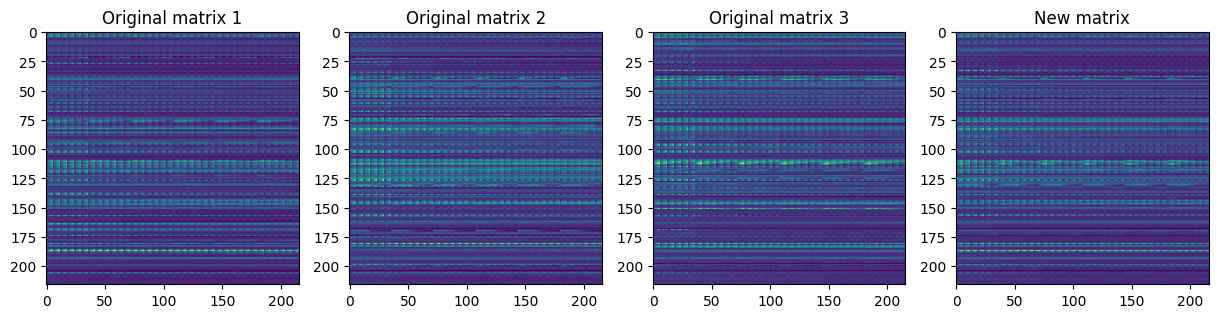

In [56]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(matrix1)
axs[0].set_title('Original matrix 1')

axs[1].imshow(matrix2)
axs[1].set_title('Original matrix 2')

axs[2].imshow(matrix3)
axs[2].set_title('Original matrix 3')

axs[3].imshow(new_matrix)
axs[3].set_title('New matrix')

plt.show()


### Crop

In [57]:
# import three transfer matrices
matrix1 = np.load("data/transfer_reward_matrix_crop_new_trial0.npy")
matrix2 = np.load("data/transfer_reward_matrix_crop_new_trial1.npy")
matrix3 = np.load("data/transfer_reward_matrix_crop_new_trial2.npy")

for seed in range(3,N_TRIAL+3):
    np.random.seed(seed*42)
    new_matrix = np.zeros_like(matrix1)
    # for each row bootstrapping from one of the three matrices
    for i in range(matrix1.shape[0]):
        choice = np.random.choice(3)
        new_matrix[i] = matrix1[i] if choice == 0 else matrix2[i] if choice == 1 else matrix3[i]
    np.save(f"data/transfer_reward_matrix_crop_new_trial{seed}.npy", new_matrix)
        

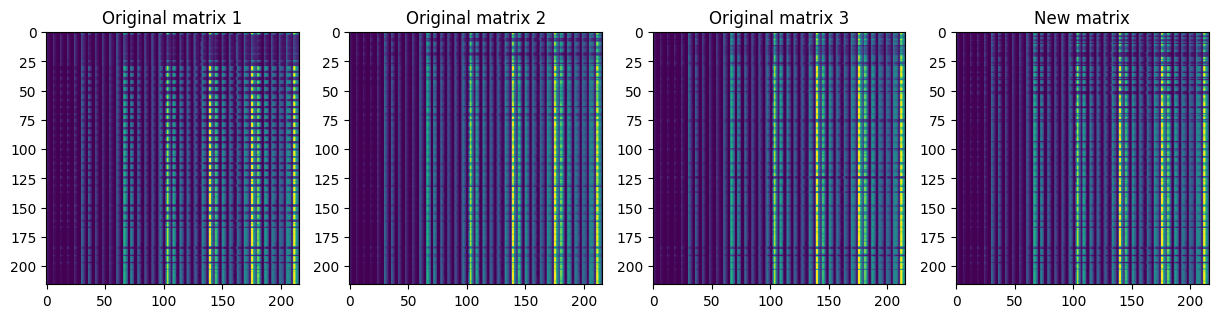

In [58]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(matrix1)
axs[0].set_title('Original matrix 1')

axs[1].imshow(matrix2)
axs[1].set_title('Original matrix 2')

axs[2].imshow(matrix3)
axs[2].set_title('Original matrix 3')

axs[3].imshow(new_matrix)
axs[3].set_title('New matrix')

plt.show()


## Generate 5d and 7d data

In [ ]:
from algs import * 
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# set the random seed
np.random.seed(0)

In [ ]:
# convert np.array([3, 3, 3]) to 333
def convert_to_str(arr):
    if arr is None:
        return None
    # if arr is string
    elif isinstance(arr, str):
        return arr
    else:
        return "".join([str(x) for x in arr])

In [ ]:
def gen_matrix_nd(
    noise=0, 
    x_weight=None, 
    y_weight=None,
    dist_weight_left=None,
    dist_weight_right=None,
    b=500,
    data_dir="data", 
    N_trial=3, 
    save_name="synt",
    context_range = None,
    weight_fx = None,
    weight_gy = None
):
    for trial in range(N_trial):
        np.random.seed(trial)

        # Contexts: [8^3, 3]
        contexts = gen_samples_nd(context_range)
        N = np.prod(context_range)

        # create distance matrix
        difference = contexts[:, np.newaxis, :] - contexts[np.newaxis, :, :] # [1000, 1000, 3]
        diff_left = difference.copy()
        diff_right = difference.copy()
        diff_left[diff_left>0]=0
        diff_right[diff_right<0]=0
        distances_matrix = -(diff_left @ dist_weight_left + diff_right @ dist_weight_right).astype(np.float64)
        
        # noise matrix
        noise_matrix = noise * np.random.normal(loc=0.0, scale=1, size=(N, N))

        # f(x) matrix, same for each row
        if x_weight=="Linear":
            fx_matrix = (contexts @ weight_fx)[:, np.newaxis]
        elif x_weight=="None":
            fx_matrix = 0

        if y_weight=="None":
            gy_matrix = 0
        elif y_weight=="Linear":
            gy_matrix = (contexts @ weight_gy)[np.newaxis, :]
        elif y_weight=="Random":
            gy_matrix = np.random.uniform(0, 50, N)[np.newaxis, :]

        matrix = b + distances_matrix + fx_matrix + gy_matrix + noise_matrix

        # plt.imshow(matrix)
        # plt.colorbar()
        # plt.title(f"Matrix with {save_name} trial {trial}")
        # plt.show()
        np.save(f"{data_dir}/transfer_reward_matrix_{save_name}_trial{trial}.npy", matrix)

In [ ]:
# 5d
context_range = [5, 5, 5, 5, 5]
d = len(context_range)
noise_list = [5]
x_weight_list = ["Linear", "None"]
y_weight_list = ["Linear", "None"]
dist_weight_left_list = [np.array([-3, -3, -3, -3, -3]), np.array([1, 1, 1, -3, -3]), np.array([1, 1, 1, 1, -3])]
dist_weight_right_list = [np.array([3, 3, 3, 3, 3])]
weight_fx = np.array([2, 2, 2, 2, 2])
weight_gy = np.array([2, 2, 2, 2, 2])
N_trial=5
for noise in noise_list:
    for x_weight in x_weight_list:
        for y_weight in y_weight_list:
            for dist_weight_left in dist_weight_left_list:
                for dist_weight_right in dist_weight_right_list:
                    save_name=f"synt_{d}dim_x_weight{convert_to_str(x_weight)}_y_weight{convert_to_str(y_weight)}_dist_left{convert_to_str(dist_weight_left)}"
                    gen_matrix_nd(
                        noise=noise,
                        x_weight=x_weight,
                        y_weight=y_weight,
                        dist_weight_left=dist_weight_left,
                        dist_weight_right=dist_weight_right,
                        N_trial=N_trial,
                        context_range=context_range,
                        weight_fx=weight_fx,
                        weight_gy=weight_gy,
                        save_name=save_name
                    )
                    print("Saved:", save_name)

In [ ]:
# 7d
context_range = [4, 4, 4, 4, 4, 4, 4]
d = len(context_range)
noise_list = [5]
x_weight_list = ["None"]
y_weight_list = ["Linear"]
dist_weight_left_list = [np.array([-3, -3, -3, -3, -3, -3, -3]), np.array([1, 1, 1, 1, 1, -3, -3])]
dist_weight_right_list = [np.array([3, 3, 3, 3, 3, 3, 3])]
weight_fx = np.array([0, 0, 0, 0, 0, 0, 0])
weight_gy = np.array([2, 2, 2, 2, 2, 2, 2])
N_trial=5
for noise in noise_list:
    for x_weight in x_weight_list:
        for y_weight in y_weight_list:
            for dist_weight_left in dist_weight_left_list:
                for dist_weight_right in dist_weight_right_list:
                    save_name=f"synt_{d}dim_x_weight{convert_to_str(x_weight)}_y_weight{convert_to_str(y_weight)}_dist_left{convert_to_str(dist_weight_left)}"
                    gen_matrix_nd(
                        noise=noise,
                        x_weight=x_weight,
                        y_weight=y_weight,
                        dist_weight_left=dist_weight_left,
                        dist_weight_right=dist_weight_right,
                        N_trial=N_trial,
                        context_range=context_range,
                        weight_fx=weight_fx,
                        weight_gy=weight_gy,
                        save_name=save_name
                    )
                    print("Saved:", save_name)